In [6]:
import json
with open('tweets.json') as jfile:
    d = json.load(jfile)

In [7]:
#Installing required pacakage
!pip install googletrans==4.0.0-rc1

  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=d796b26787446cb24e062b6d0c0231e7a5732d534ed711f5ff01e0942c1b57fa
  Stored in directory: c:\users\subha\appdata\local\pip\cache\wheels\60\b3\27\d8aff3e2d5c2d0d97a117cdf0d5f13cd121e2c2b5fb49b55a0
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('stopwords')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
#Importing Pandas to work with dataframe
import pandas as pd     

#Importing numpy for working with numpy arrays and other functions
import numpy as np      

#Importing json for reading the json file of tweets
import json

import re

#Elimination of Stop words
from nltk.corpus import stopwords 
from nltk.util import ngrams 

#Counting the frequency
from collections import Counter

#NLP Toolkit
import nltk


# For visualization:
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Translator from googletrans for tweet translation purpose
from googletrans import Translator

# STEP 1 - Analysis of Raw Data

In [11]:
#Reading Jason file as a dictonary 
with open("tweets.json") as jfile:

  df = json.load(jfile)

In [12]:
df

{'1374140386071961602': {'tweet_author': 'Hematopoiesis News',
  'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'},
 '1374032432173842437': {'tweet_author': 'Michael Wang, MD',
  'tweet_text': 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'},
 '1373902876553048065': {'tweet_author': '1stOncology',
  'tweet_text': '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'},
 '1373656782367813635': {'tweet_author': 'Toby Eyre',
  'tweet_text': '#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologi

# Step 2 - Converting raw data into Pandas Dataframe

In [14]:
#Creating a pandas dataframe out of dictonary
temp='tweet_author'
lst1 = [val[temp] for key, val in df.items() if temp in val]

temp1='tweet_text'
lst2 = [val[temp1] for key, val in df.items() if temp1 in val]

#Dropping id as it is of no use
data = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['tweet_author', 'tweet_text'])

#For use in objective 2 making a copy of data
data_copy=data.copy()

In [15]:
data

,tweet_author,tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...


# STEP 3 - Defining Important functions for further anlalysis

In [17]:
#Function to remove the sentences starting with particular character or pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# STEP 4 - Converting Tweets to English language

In [18]:
#Converting Tweets into English

#Function for translating the tweets into English
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.kr',
    ])
data['tweet_text'].astype(str)
data = data.loc[data['tweet_text'] != '']

#Replacing '.' with '. ' for Data translation issue
data['tweet_text'] = data['tweet_text'].str.replace('.', '. ')
 
#Some tweets are in japanese so converting it into english
data['tweet_text']=data['tweet_text'].apply(translator.translate, src='ja', dest='en').apply(getattr, args=('text',))
# data['clean_tweet']=data['clean_tweet'].apply(translator.translate, src='hi', dest='en').apply(getattr, args=('text',))

C:\Users\subha\AppData\Local\Temp/ipykernel_19068/40079596.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['tweet_text'] = data['tweet_text'].str.replace('.', '. ')


ReadTimeout: The read operation timed out

In [ ]:
data

# STEP 5 - Data preprocessing (Cleaning Tweets)

In [19]:
#removing hashtags (word starting with #)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet_text'], "#[\w]*")

#removing hashtags (word starting with https)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "https[\w]*")

#remove user, https, and RT
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "https|RT|@[\w]*")

#remove punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

#lowering string
data['clean_tweet'] = data['clean_tweet'].str.lower()

#remove stop words
stop_words = set(stopwords.words('english')) 


# #remove words with len < 2
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

C:\Users\subha\AppData\Local\Temp/ipykernel_19068/2398893388.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


In [20]:
#Creating a list of clean tweets 
data['clean_tweet'] = [' '.join([w for w in x.lower().split() if w not in stop_words]) 
    for x in data['clean_tweet'].tolist()]

In [21]:
data

,tweet_author,tweet_text,clean_tweet
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase study acalabrutinib...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,backs lpdogra
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,valuable option pts intolerant valuable data h...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommended use acalabrutinib patients tr...
...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http pdleww bbb
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http gynchdnul
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder noch refrakt res fo...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk expression immunochemotherapy outcome chro...


# Step 6 - Extracting Entities and finding frequency of it

In [22]:
#Checking the difference in the tweets and clean_tweets

print(data['clean_tweet'][0])
print(data['tweet_text'][0])

scientists conducted phase study acalabrutinib patients relapsed refractory ibrutinib intolerant found overall response rate qpc kuzz
⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%.  
https://t. co/eJ6m4QpC5P https://t. co/kuZz6ZO47r


# Extracting Entities
Extracting entities based on Noun Phrases.
Why Noun Phrases only ?
Noun phrases are the main entities in a sentence that hold the core reason or main idea of the sentence. It in the main context of the passage and here at analysis of the tweets, this is the one be helpful for sentiment analysis.

In [25]:
!pip install textblob

In [26]:
#Importing TextBlob for looking for noun_Phrases into the tweets 

#An example from the extraction of noun_phrases on the sentence from assignment example
from textblob import TextBlob
wiki = TextBlob('Pink Pearl Apples are tasty but Empire Apples are not.')
wiki.noun_phrases

WordList(['pink pearl apples', 'apples'])

In [27]:
#Applying over the clean tweets column to extract the entities

from textblob import TextBlob
# nltk.download('wordnet')
# nltk.download('brown')
# nltk.download('punkt')

def blob(text):
  return TextBlob(text).noun_phrases

Entities = data['clean_tweet'].apply(blob)
data["entities"]=Entities

In [28]:
data

,tweet_author,tweet_text,clean_tweet,entities
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase study acalabrutinib...,"[phase study acalabrutinib patients, refractor..."
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,"[phase acalabrutinib venetoclax trial, recruit..."
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,backs lpdogra,[backs lpdogra]
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,valuable option pts intolerant valuable data h...,"[valuable option pts intolerant, valuable data..."
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommended use acalabrutinib patients tr...,[acalabrutinib patients treatment chronic lymp...
...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http pdleww bbb,[friends http pdleww bbb]
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http gynchdnul,[friends http gynchdnul]
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder noch refrakt res fo...,[zusatznutzen von ist weder noch refrakt res f...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk expression immunochemotherapy outcome chro...,[ptk expression immunochemotherapy outcome chr...


# Counting frequency of the tweets

In [29]:
#Combining words into one list and count the appearance of each entity.

# from functools import reduce
# l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
l=data["entities"]

#Counting the most repeated entity
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()

# Creating a Dataframe with its frequency in decending order

In [30]:
#Creating a dataframe
entity_df = pd.DataFrame.from_records(counts, columns=['entity', 'frequency'])
entity_df['entity']= entity_df['entity'].apply(lambda x: ''.join([w for w in x]))

In [31]:
#New dataframe of most entity and there occurence
entity_df.head(10)

,entity,frequency
0,chronic lymphocytic leukemia,1102
1,cancer adults amp,373
2,new article,284
3,new trial,250
4,refractory chronic lymphocytic leukemia,216
5,chronic lymphocytic leukemia cll,177
6,high risk,163
7,powerful new kind cancer drug,162
8,fda approves,159
9,available placebo,155


# STEP 7 - Data Visualization

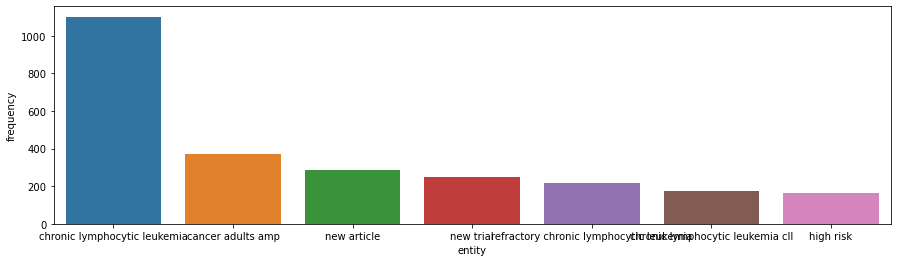

In [54]:
#Data Visualization with bar graph
df_new=entity_df.copy()

df_new = df_new.nlargest(columns="frequency", n = 7) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_new, x= "entity", y = "frequency")
ax.set(ylabel = 'frequency')
plt.show()

# STEP 8 - Objective 1 soluction

In [33]:
entity_df.to_csv('entity.csv')

# STEP 9 - Objective 2 Soluction

In [34]:
#Creating the copy of the dataframe for further use
data2=data.copy()
data2

,tweet_author,tweet_text,clean_tweet,entities
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase study acalabrutinib...,"[phase study acalabrutinib patients, refractor..."
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,"[phase acalabrutinib venetoclax trial, recruit..."
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,backs lpdogra,[backs lpdogra]
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,valuable option pts intolerant valuable data h...,"[valuable option pts intolerant, valuable data..."
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommended use acalabrutinib patients tr...,[acalabrutinib patients treatment chronic lymp...
...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http pdleww bbb,[friends http pdleww bbb]
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http gynchdnul,[friends http gynchdnul]
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder noch refrakt res fo...,[zusatznutzen von ist weder noch refrakt res f...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk expression immunochemotherapy outcome chro...,[ptk expression immunochemotherapy outcome chr...


In [36]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
#Importing required library
import pandas as pd
import re
import plotly.express as px
import nltk
import spacy

ImportError: cannot import name dataclass_transform

In [42]:
nlp = spacy.load('en_core_web_sm')

NameError: name 'spacy' is not defined

In [43]:
!pip install vaderSentiment

In [44]:
#Importing the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()

data2["clean_tweet"]= data2["entities"].astype(str)
# Applying Model, Variable Creation
data2['Polarity Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['compound'])
data2['Neutral Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['neu'])
data2['Negative Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['neg'])
data2['Positive Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
data2['overall polarity']=''
data2.loc[data2['Polarity Score']>0,'overall polarity']='Positive'
data2.loc[data2['Polarity Score']==0,'overall polarity']='Neutral'
data2.loc[data2['Polarity Score']<0,'overall polarity']='Negative'
data2[:5]

,tweet_author,tweet_text,clean_tweet,entities,Polarity Score,Neutral Score,Negative Score,Positive Score,overall polarity
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,"['phase study acalabrutinib patients', 'refrac...","[phase study acalabrutinib patients, refractor...",0.0000,1.000,0.000,0.000,Neutral
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,"['phase acalabrutinib venetoclax trial', 'recr...","[phase acalabrutinib venetoclax trial, recruit...",0.0000,1.000,0.000,0.000,Neutral
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,['backs lpdogra'],[backs lpdogra],-0.0516,0.455,0.545,0.000,Negative
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,"['valuable option pts intolerant', 'valuable d...","[valuable option pts intolerant, valuable data...",0.4767,0.693,0.000,0.307,Positive
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,['acalabrutinib patients treatment chronic lym...,[acalabrutinib patients treatment chronic lymp...,0.0000,1.000,0.000,0.000,Neutral


In [45]:
# Copying data2 in data3 for changing the the format for submission and conversion in csv file.
data3=data2.copy()

In [46]:
data3

,tweet_author,tweet_text,clean_tweet,entities,Polarity Score,Neutral Score,Negative Score,Positive Score,overall polarity
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,"['phase study acalabrutinib patients', 'refrac...","[phase study acalabrutinib patients, refractor...",0.0000,1.000,0.000,0.000,Neutral
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,"['phase acalabrutinib venetoclax trial', 'recr...","[phase acalabrutinib venetoclax trial, recruit...",0.0000,1.000,0.000,0.000,Neutral
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,['backs lpdogra'],[backs lpdogra],-0.0516,0.455,0.545,0.000,Negative
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,"['valuable option pts intolerant', 'valuable d...","[valuable option pts intolerant, valuable data...",0.4767,0.693,0.000,0.307,Positive
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,['acalabrutinib patients treatment chronic lym...,[acalabrutinib patients treatment chronic lymp...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,['friends http pdleww bbb'],[friends http pdleww bbb],0.4767,0.492,0.000,0.508,Positive
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,['friends http gynchdnul'],[friends http gynchdnul],0.4767,0.392,0.000,0.608,Positive
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,['zusatznutzen von ist weder noch refrakt res ...,[zusatznutzen von ist weder noch refrakt res f...,0.0000,1.000,0.000,0.000,Neutral
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,['ptk expression immunochemotherapy outcome ch...,[ptk expression immunochemotherapy outcome chr...,0.0000,1.000,0.000,0.000,Neutral


In [47]:
#Dropping the excess columns
data3=data3.drop(['tweet_text',	'clean_tweet',	'Polarity Score',	'Neutral Score',	'Negative Score',	'Positive Score'], axis=1)

In [48]:
#Making the entites along with author sentiments on it as a list
data3['entities'] = [','.join([''.join(y) for y in x]) for x in data['entities']]

In [49]:
data3

,tweet_author,entities,overall polarity
0,Hematopoiesis News,"phase study acalabrutinib patients,refractory ...",Neutral
1,"Michael Wang, MD","phase acalabrutinib venetoclax trial,recruitme...",Neutral
2,1stOncology,backs lpdogra,Negative
3,Toby Eyre,"valuable option pts intolerant,valuable data,d...",Positive
4,Lymphoma Hub,acalabrutinib patients treatment chronic lymph...,Neutral
...,...,...,...
43342,Joy is a Lifestyle,friends http pdleww bbb,Positive
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,friends http gynchdnul,Positive
43344,IQWiG,zusatznutzen von ist weder noch refrakt res fo...,Neutral
43345,Medibooks,ptk expression immunochemotherapy outcome chro...,Neutral


In [50]:
#Changing the format 
data3=data3[['entities','tweet_author','overall polarity']]


In [51]:
data3.rename(columns = {'entities':'entity','tweet_author':'author'}, inplace = True)


In [52]:
data3

,entity,author,overall polarity
0,"phase study acalabrutinib patients,refractory ...",Hematopoiesis News,Neutral
1,"phase acalabrutinib venetoclax trial,recruitme...","Michael Wang, MD",Neutral
2,backs lpdogra,1stOncology,Negative
3,"valuable option pts intolerant,valuable data,d...",Toby Eyre,Positive
4,acalabrutinib patients treatment chronic lymph...,Lymphoma Hub,Neutral
...,...,...,...
43342,friends http pdleww bbb,Joy is a Lifestyle,Positive
43343,friends http gynchdnul,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Positive
43344,zusatznutzen von ist weder noch refrakt res fo...,IQWiG,Neutral
43345,ptk expression immunochemotherapy outcome chro...,Medibooks,Neutral


# STEP 10 - Saving the objective2.csv file

In [53]:
data3.to_csv("objective_2.csv")